In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns

In [2]:
df= pd.read_csv('amazonreviews.tsv', sep='\t', dtype=str)
df.head(20)

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
5,pos,an absolute masterpiece: I am quite sure any o...
6,neg,"Buyer beware: This is a self-published book, a..."
7,pos,Glorious story: I loved Whisper of the wicked ...
8,pos,A FIVE STAR BOOK: I just finished reading Whis...
9,pos,Whispers of the Wicked Saints: This was a easy...


In [3]:
df.shape

(10000, 2)

In [4]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [5]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [6]:
df.dropna(inplace=True)

<AxesSubplot:ylabel='label'>

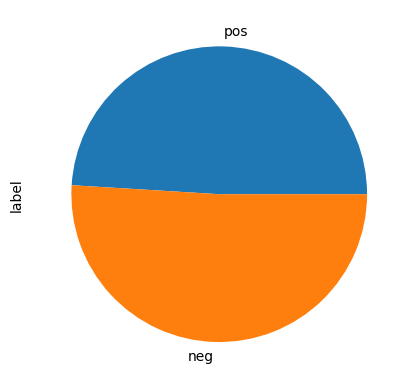

In [7]:
df['label'].value_counts().sort_values().plot(kind = 'pie')

In [8]:
blanks = [] 
for i,lb,rv in df.itertuples():  
    if type(rv)==str:            
        if rv.isspace():        
            blanks.append(i)             
df.drop(blanks, inplace=True)

In [9]:
X=df['review']
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression 
lr_model=Pipeline([('tfidf', TfidfVectorizer(lowercase=False)),( 'clf',LogisticRegression(solver='lbfgs'))])
lr_model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=False)),
                ('clf', LogisticRegression())])

In [77]:
predictions= lr_model.predict(X_test)
report = classification_report(y_test,predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("red", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
neg,0.840000,0.880000,0.860000,1649.000000
pos,0.870000,0.830000,0.850000,1651.000000
accuracy,0.850000,0.850000,0.850000,0.850000
macro avg,0.850000,0.850000,0.850000,3300.000000
weighted avg,0.850000,0.850000,0.850000,3300.000000


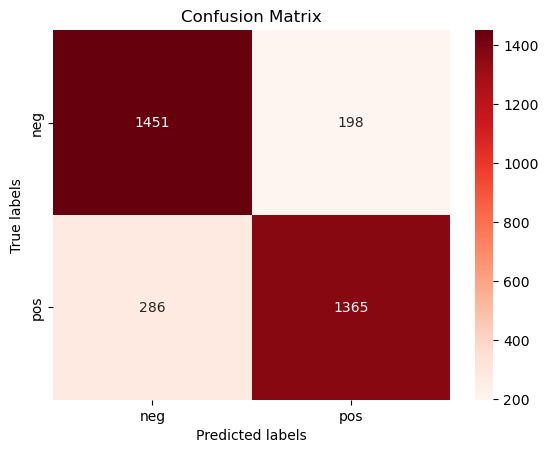

In [78]:
import matplotlib.pyplot as plt
ax= plt.subplot()
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['neg', 'pos']); ax.yaxis.set_ticklabels(['neg', 'pos']);

In [79]:
my_model=Pipeline([('tfidf', TfidfVectorizer()),('classifier',LinearSVC())])
my_model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

In [80]:
predictions= my_model.predict(X_test)
report = classification_report(y_test,predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("red", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
neg,0.860000,0.890000,0.870000,1649.000000
pos,0.890000,0.850000,0.870000,1651.000000
accuracy,0.870000,0.870000,0.870000,0.870000
macro avg,0.870000,0.870000,0.870000,3300.000000
weighted avg,0.870000,0.870000,0.870000,3300.000000


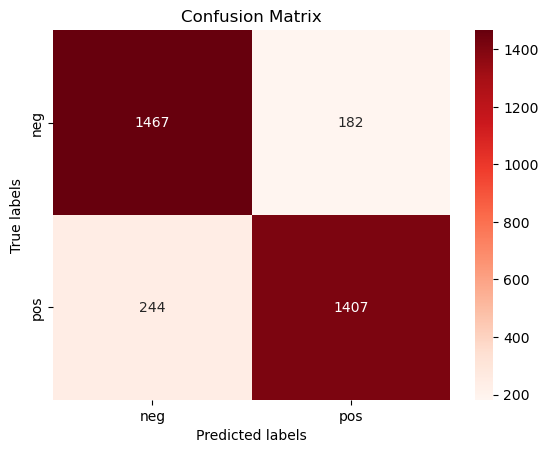

In [81]:
predictions=my_model.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
ax= plt.subplot()
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['neg', 'pos']); ax.yaxis.set_ticklabels(['neg', 'pos']);

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
kmodel=Pipeline([('tfidf', TfidfVectorizer(lowercase=False)),( 'clf',KNeighborsClassifier(n_neighbors = 2))])
kmodel.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=False)),
                ('clf', KNeighborsClassifier(n_neighbors=2))])

In [84]:
predictions= kmodel.predict(X_test)
report = classification_report(y_test,predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("red", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

C:\Users\osaru\anaconda3\envs\compvis\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,precision,recall,f1-score,support
neg,0.610000,0.860000,0.720000,1649.000000
pos,0.770000,0.460000,0.580000,1651.000000
accuracy,0.660000,0.660000,0.660000,0.660000
macro avg,0.690000,0.660000,0.650000,3300.000000
weighted avg,0.690000,0.660000,0.650000,3300.000000


C:\Users\osaru\anaconda3\envs\compvis\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


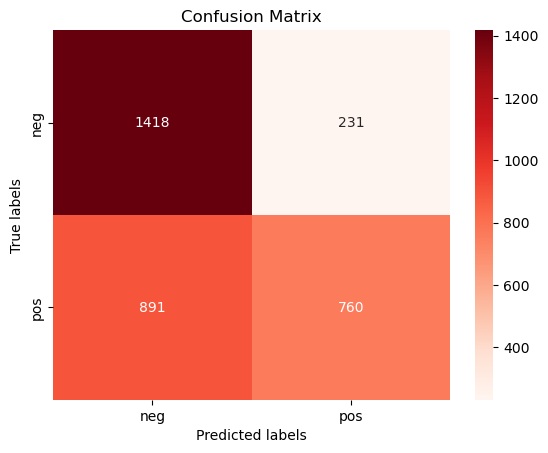

In [85]:
predictions=kmodel.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
ax= plt.subplot()
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['neg', 'pos']); ax.yaxis.set_ticklabels(['neg', 'pos']);

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dmodel=Pipeline([('tfidf', TfidfVectorizer(lowercase=False)),( 'clf', DecisionTreeClassifier(max_depth =10, random_state = 42))])
dmodel.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=False)),
                ('clf', DecisionTreeClassifier(max_depth=10, random_state=42))])

In [88]:
predictions= dmodel.predict(X_test)
report = classification_report(y_test,predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("red", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
neg,0.780000,0.530000,0.630000,1649.000000
pos,0.640000,0.850000,0.730000,1651.000000
accuracy,0.690000,0.690000,0.690000,0.690000
macro avg,0.710000,0.690000,0.680000,3300.000000
weighted avg,0.710000,0.690000,0.680000,3300.000000


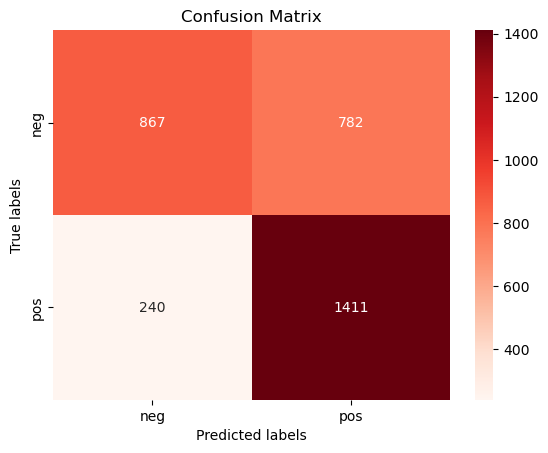

In [89]:
predictions=dmodel.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
ax= plt.subplot()
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['neg', 'pos']); ax.yaxis.set_ticklabels(['neg', 'pos']);

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [91]:
lmodel=Pipeline([('tfidf', TfidfVectorizer(lowercase=False)),( 'clf', LinearDiscriminantAnalysis())])
Xnumpy = np.array(X_train)
type(Xnumpy)

numpy.ndarray

In [92]:
X_train.todense()
lmodel.fit(X_train,y_train)

AttributeError: 'Series' object has no attribute 'todense'